<a href="https://colab.research.google.com/github/lucky-mishra-25/Data-science/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

# EDA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


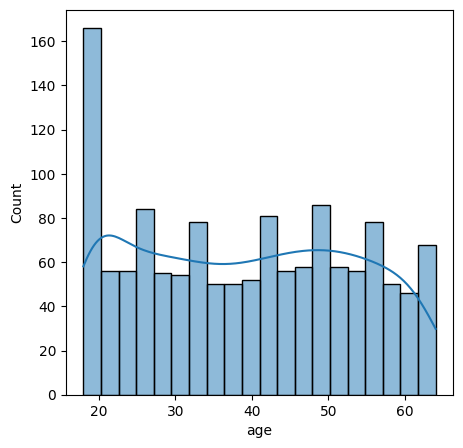

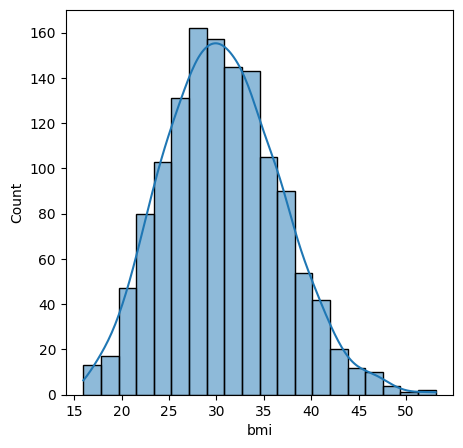

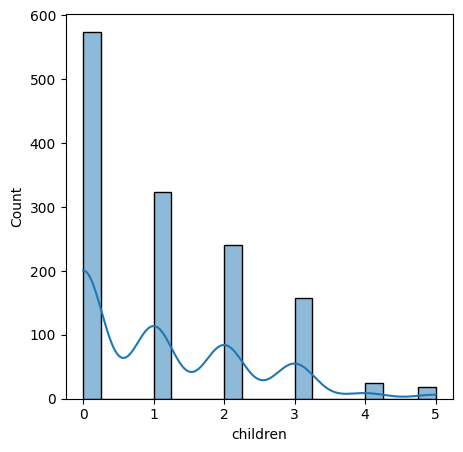

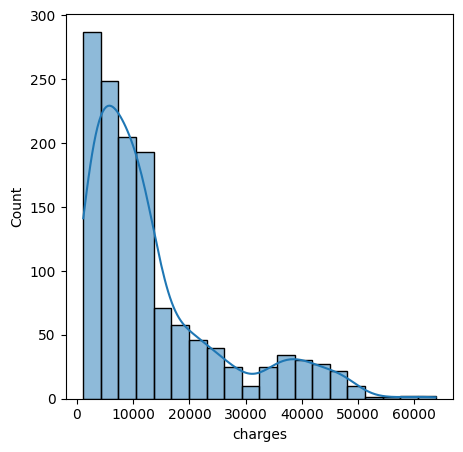

In [9]:
from pandas.core.arrays import numeric
numeric_columns = ['age', 'bmi', 'children', 'charges']
categorical_columns = ['sex', 'smoker', 'region']

for col in numeric_columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(df[col], kde=True,bins = 20)

<Axes: xlabel='children', ylabel='count'>

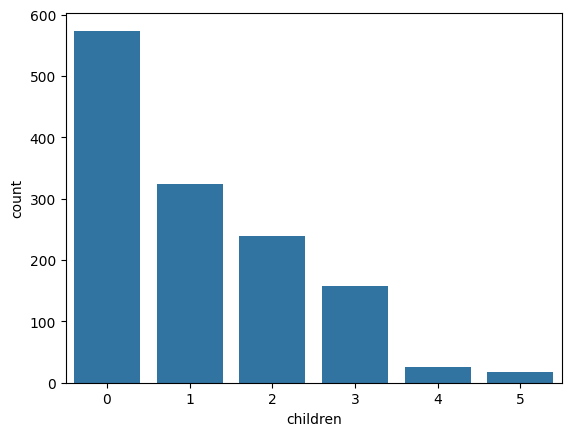

In [10]:
sns.countplot(x = df['children'])

<Axes: xlabel='smoker', ylabel='count'>

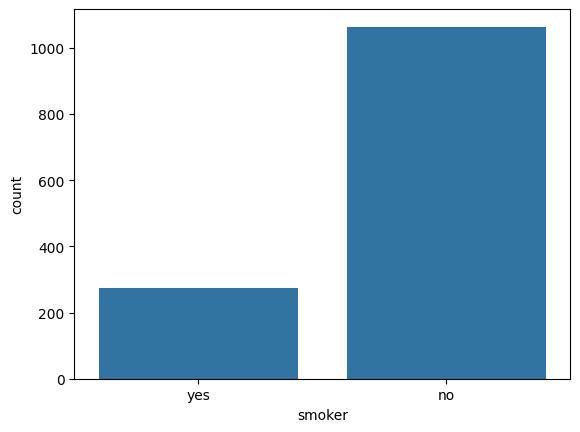

In [11]:
sns.countplot(x = df['smoker'])

<Axes: xlabel='sex', ylabel='count'>

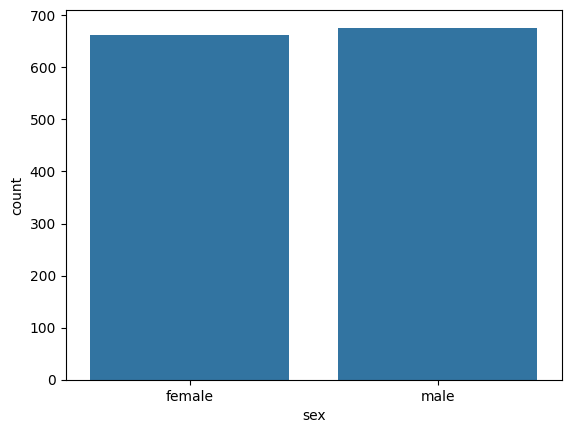

In [12]:
sns.countplot(x = df['sex'])

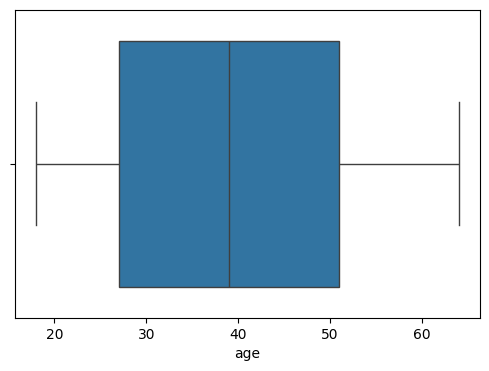

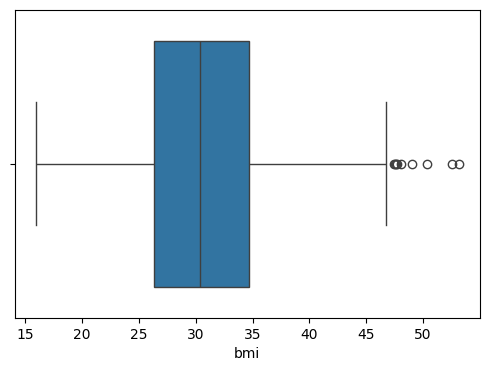

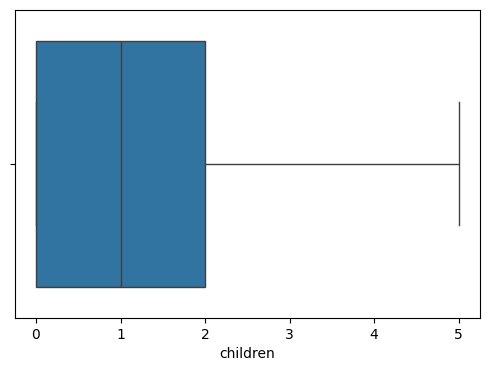

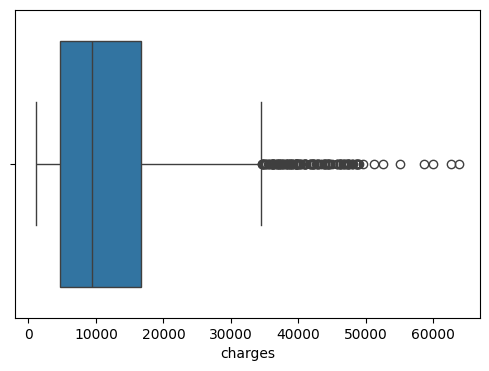

In [13]:
for col in numeric_columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x = df[col])

<Axes: >

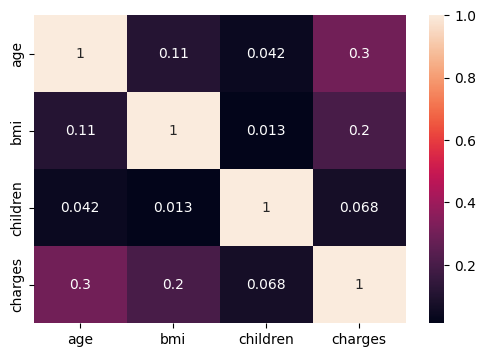

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# data Cleaning and Data Processing


In [15]:
df_cleaned = df.copy()
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df_cleaned.shape

(1338, 7)

In [17]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1337, 7)

In [18]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [19]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [20]:
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [21]:
df_cleaned['sex'] = df_cleaned['sex'].map({'female': 1, 'male': 0})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [22]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [23]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'yes': 1, 'no': 0})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [24]:
df_cleaned.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker'},inplace=True)

In [25]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [26]:
df_cleaned['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [27]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'])
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [28]:
df_cleaned = df_cleaned.astype(int)

In [29]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0
1334,18,1,31,0,0,2205,1,0,0,0
1335,18,1,36,0,0,1629,0,0,1,0
1336,21,1,25,0,0,2007,0,0,0,1


# feature engineering and extraction

<Axes: xlabel='bmi', ylabel='Count'>

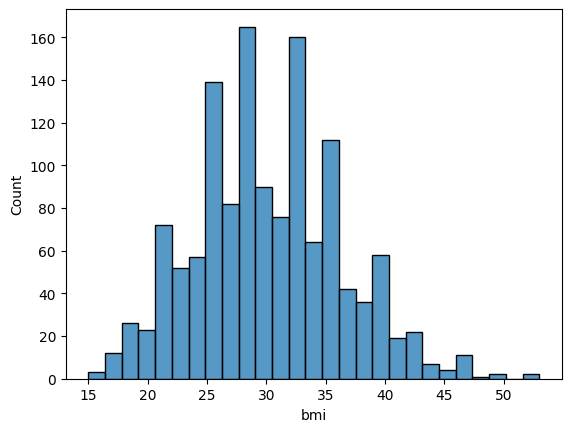

In [30]:
sns.histplot(df_cleaned['bmi'])

In [31]:
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                                    labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight


In [32]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'])
df_cleaned = df_cleaned.astype(int)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0


In [33]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


In [35]:
from scipy.stats import pearsonr

selected_features = [
    'age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'
]

correlation = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlation.items()), columns=['Feature', 'Correlation'])
correlation_df.sort_values(by='Correlation', ascending=False, inplace=True)
correlation_df

,Feature,Correlation
4,is_smoker,0.787234
0,age,0.298309
12,bmi_category_Obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
5,region_northeast,0.005946
6,region_northwest,-0.038695
8,region_southwest,-0.043637
9,bmi_category_Underweight,-0.050599


In [36]:
cat_features = [
    'is_female', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese']


In [37]:
from scipy.stats import chi2_contingency
alpha = 0.05
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q = 4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    decisiion = 'Reject Null Hypothesis' if p < alpha else 'Fail to Reject Null Hypothesis'
    chi2_results[col] = {
        'Chi-Square Statistic': chi2,
        'P-Value': p,
        'decision': decisiion
    }

chi2_results_df = pd.DataFrame(chi2_results).T
chi2_results_df

,Chi-Square Statistic,P-Value,decision
is_female,10.258784,0.01649,Reject Null Hypothesis
is_smoker,848.219178,0.0,Reject Null Hypothesis
region_northeast,6.438442,0.092122,Fail to Reject Null Hypothesis
region_northwest,1.13424,0.768815,Fail to Reject Null Hypothesis
region_southeast,15.998167,0.001135,Reject Null Hypothesis
bmi_category_Normal,3.708088,0.29476,Fail to Reject Null Hypothesis
bmi_category_Overweight,4.25149,0.235557,Fail to Reject Null Hypothesis
bmi_category_Obese,8.515711,0.036473,Reject Null Hypothesis


In [39]:
final_df = df_cleaned[['age','is_female','bmi','children','is_smoker','charges','region_southeast','bmi_category_Obese']]
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0


In [41]:
from sklearn.model_selection import train_test_split
x = final_df.drop('charges', axis=1)
y = final_df['charges']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 42)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)
y_pred

array([ 7.92127799e+03,  4.92119238e+03,  1.44361661e+04,  3.18350564e+04,
        8.67581266e+03,  1.31496370e+04,  2.96706500e+04,  1.35753225e+03,
        1.11138061e+04,  9.75901566e+03,  1.09718507e+04,  3.19207448e+04,
        3.11479922e+04,  1.64631895e+04,  1.01416669e+04,  8.32071774e+03,
        5.33803897e+03,  3.20017531e+04,  3.02451537e+03,  3.68006468e+03,
        4.66358966e+03,  2.83775977e+04,  1.37230536e+04,  2.91390286e+04,
        3.12678786e+04,  6.11451613e+03,  3.45210883e+04,  3.77368630e+04,
        1.25138644e+04,  1.39034203e+04,  7.61698339e+03,  1.29803907e+04,
        2.19973352e+02,  1.13562442e+04,  3.73840277e+04,  1.34005302e+04,
        3.09042974e+03,  4.18337835e+03,  3.11602233e+04,  7.90007874e+03,
        6.09078081e+03,  2.99188465e+04,  3.46245387e+04,  1.31113974e+04,
        7.82128672e+03,  2.97515542e+03,  5.17030083e+03,  7.58441192e+03,
        3.39821208e+03,  1.01377275e+04,  7.54018550e+03,  1.05902298e+04,
        2.99695962e+04,  

In [46]:
y_test

,charges
900,8688
1064,5708
1256,11436
298,38746
237,4463
...,...
731,10065
321,24671
477,2534
784,4350


In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n-p-1))

In [52]:
adjusted_r2

0.7700796492075324